# Convolutional Neural Networks

## Preliminaries

In this practical session you will implement and train several Convolutional Neural Networks (CNNs) using the Keras framework with a Tensorflow backend. If you are not already familiar with Keras, you can go over the [following tutorial](https://github.com/tueimage/essential-skills/blob/master/keras.md). More detailed information on the different functionalities can be found in the [Keras library documentation](https://keras.io/).

Note that for this set of exercise CPU-only Tensorflow, which you should already have installed, is sufficient (i.e. GPU-support is not required but it will make your experiments run faster).

You are also required to use the `gryds` package for data augmentation that you can install directly from git: `pip install git+https://github.com/tueimage/gryds/`.

You also have to install the Keras deep learning framework (if you have not done so already) by running `conda install keras`. Note that there are two implementations of Keras, one from https://keras.io/ and another one that ships with Tensorflow. Here we use the former.

In [1]:
pip install git+https://github.com/tueimage/gryds/

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/tueimage/gryds/ to c:\users\20191678\appdata\local\temp\pip-req-build-b6ygu4ap
  Resolved https://github.com/tueimage/gryds/ to commit cda4bac8f71e8bb47fc632b8cdea010904ae5cf1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/tueimage/gryds/ 'C:\Users\20191678\AppData\Local\Temp\pip-req-build-b6ygu4ap'


## MNIST
We will first train a simple CNN to classify handwritten digits using the MNIST dataset. This dataset is often referred to as the "Hello world!" example of deep learning because it can be used to quickly illustrate a small neural network in action (and obtain a decent classification accuracy in the process). More information on it can be found [here](http://yann.lecun.com/exdb/mnist/).

First, let's load the dataset and visualize some images.

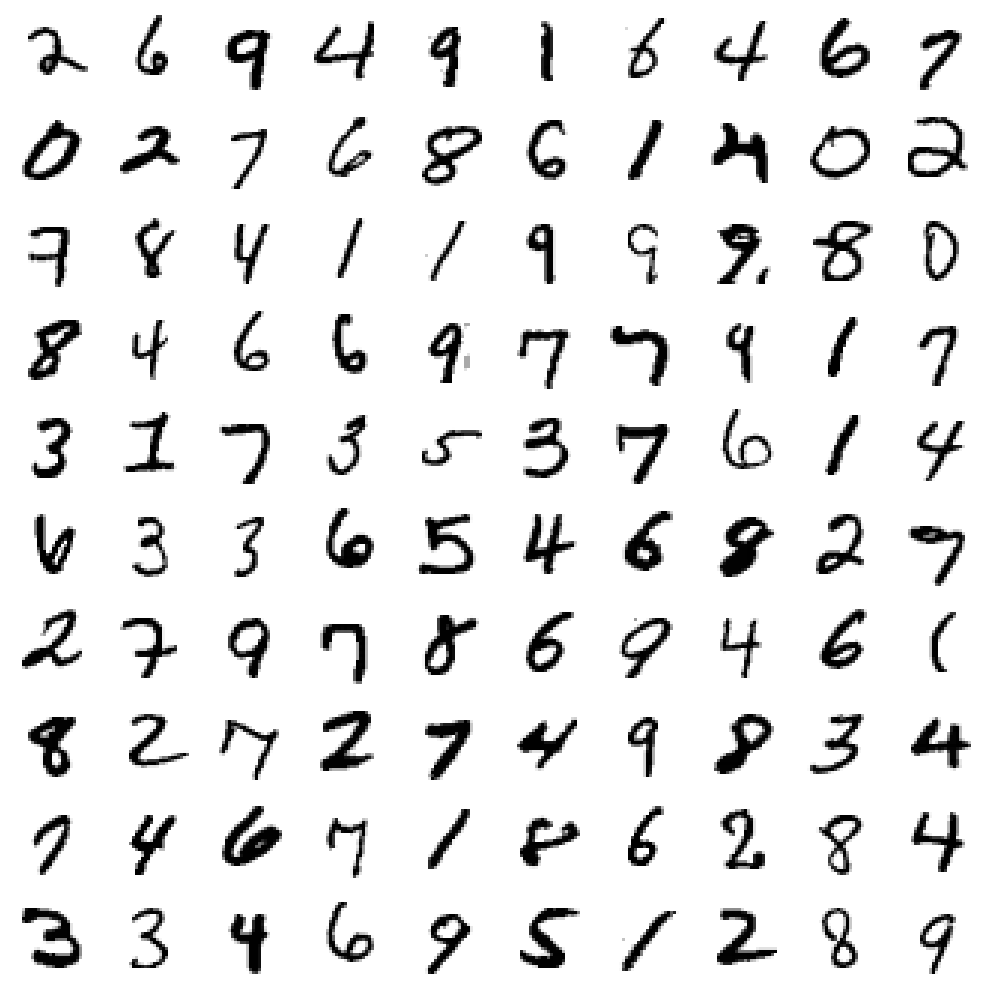

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

# load the MNIST the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale the image intensities to the 0-1 range
x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)

# convert the data to channel-last
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# convert the labels to one-hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

def plot_images(images, dim=(10, 10), figsize=(10, 10), title=''):

    plt.figure(figsize=figsize)

    for i in range(images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle(title)
    plt.show()

plot_images(x_train[np.random.randint(0, x_train.shape[0], size=100)].reshape(100, 28, 28))

The MNIST classification task is quite simple: given an image, predict the digit that it contains. Thus, this is a 10-class classification problem.

Let's define a simple network for the handwritten digit classification.

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

Compile and train the network (note that this could take a while).

In [4]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 81s 170ms/step - loss: 0.2456 - accuracy: 0.9252 - val_loss: 0.0506 - val_accuracy: 0.9843
Epoch 2/12
469/469 [==============================] - 81s 173ms/step - loss: 0.0843 - accuracy: 0.9754 - val_loss: 0.0393 - val_accuracy: 0.9866
Epoch 3/12
469/469 [==============================] - 78s 166ms/step - loss: 0.0619 - accuracy: 0.9811 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 4/12
469/469 [==============================] - 80s 170ms/step - loss: 0.0511 - accuracy: 0.9843 - val_loss: 0.0333 - val_accuracy: 0.9898
Epoch 5/12
469/469 [==============================] - 77s 164ms/step - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.0357 - val_accuracy: 0.9892
Epoch 6/12
469/469 [==============================] - 77s 164ms/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.0316 - val_accuracy: 0.9894
Epoch 7/12
469/469 [==============================] - 77s 163ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0267 - val_ac

Now that the model is trained, we can evaluate its performance on the independent test dataset.

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02760450169444084
Test accuracy: 0.991599977016449


## U-Net
The U-Net convolutional neural network architecture was first developed for biomedical image segmentation and is to this day one of the most widely used methods for image segmentation. The details of the architecture can be found in the [original paper](https://arxiv.org/abs/1505.04597). In this practical we will build and train a U-Net network that is able to segment blood vessels in retinal images.

### Loading and visualizing the data
The data for this task is taken from the [DRIVE](https://www.isi.uu.nl/Research/Databases/DRIVE/index.php) database. It consists of photographs of the retina, where the goal is to segment the blood vessels within. The dataset has a total of 40 photographs, divided in 20 images for training and 20 for testing. The images corresponding to the DRIVE test set can be found [here](https://www.dropbox.com/s/zk51wgupimw7jd9/DRIVE.zip?dl=0).

Let's load the training set and visualize an image with the corresponding blood vessel segmentation. For training we will divide the data in a training and a validation set to monitor the model during training.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

(20, 584, 565, 3)


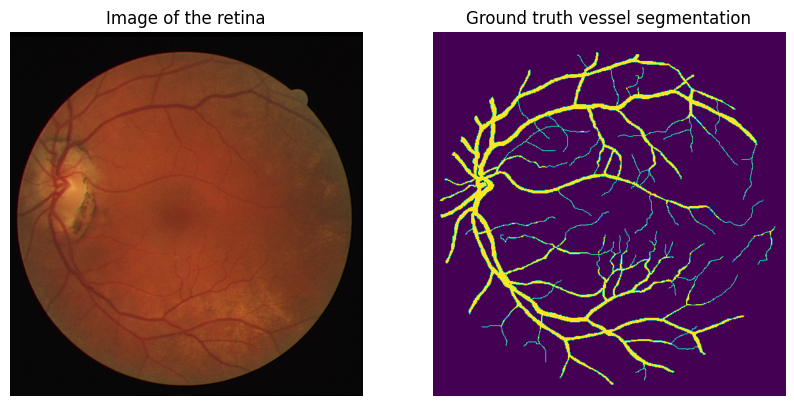

(16, 584, 565, 3)
(16, 584, 565, 1)
(16, 584, 565, 1)
(4, 584, 565, 3)
(4, 584, 565, 1)
(4, 584, 565, 1)


In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from glob import glob
import sys
import os
sys.path.append('/content/drive/MyDrive/')
sys.path.append(os.path.abspath('Drive'))

from unet_utils import load_data

# location of the DRIVE dataset
data_folder = '/content/drive/MyDrive/DRIVE/'
train_paths = glob(data_folder + 'training/images/*.tif')
images, masks, segmentations = load_data(train_paths)

# print the shape of image dataset
print(images.shape)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(segmentations[0][:, :, 0])

plt.show()

# divide in training and validation
train_images, val_images, train_masks, val_masks, train_segmentations, val_segmentations = train_test_split(
    images, masks, segmentations, test_size=0.2, random_state=7)

# print the shape of the training and valudation datasets
print(train_images.shape)
print(train_masks.shape)
print(train_segmentations.shape)
print(val_images.shape)
print(val_masks.shape)
print(val_segmentations.shape)

### Training a U-Net model

You are already provided with implementation of the U-Net architecture in `unet_model.py`. This is a modular implementation and can be used to generate U-Net architectures with a variety of hyperparameters such as depth and number of feature maps. Before using the model, examine the code and documentation and make sure that you understand all the details.

We will train a U-Net model using smaller patches extracted from the training images. Training the images on smaller patches requires less computation power and results in a more varied training dataset (it has the effect of data augmentation by image translation). Because a U-Net is a fully convolutional network it can be evaluated on inputs of different size (the output size will change according to the input size). Thus, although the model will be trained on smaller patches it can still be used to segment larger images with one pass through the model.


(16, 32, 32, 3)


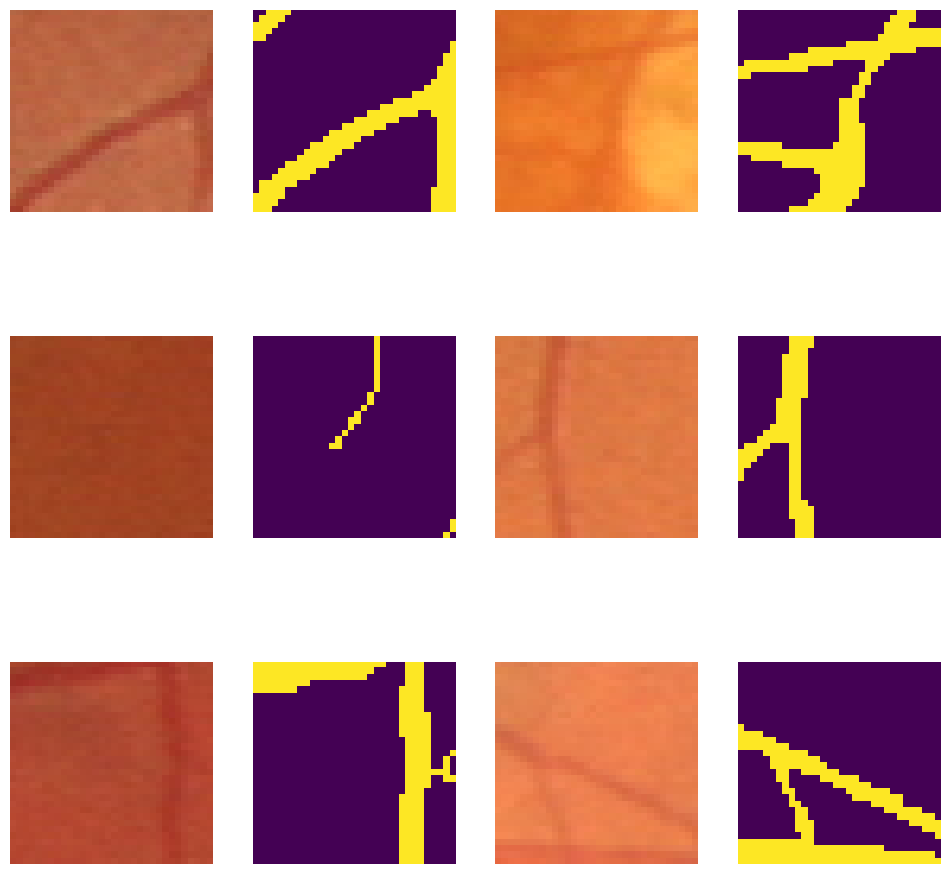

In [8]:
from unet_utils import extract_patches, preprocessing

# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# visualize a couple of patches as a visual check
patches, patches_segmentations = extract_patches(train_images, train_segmentations, patch_size, patches_per_im=1, seed=7)

print(patches.shape)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

for i in range(0, 3):
    axes[i, 0].axis('off')
    axes[i, 0].imshow(patches[i])
    axes[i, 1].axis('off')
    axes[i, 1].imshow(patches_segmentations[i][:, :, 0])
    axes[i, 2].axis('off')
    axes[i, 2].imshow(patches[i+5])
    axes[i, 3].axis('off')
    axes[i, 3].imshow(patches_segmentations[i+5][:, :, 0])

plt.show()

In [9]:
# pad the validation data to fit the U-Net model
# images of shape (584, 565) shape result in concatenation error due to the odd number of columns

print("Old shape:", val_images.shape)

val_images, val_masks, val_segmentations = preprocessing(
    val_images,
    val_masks,
    val_segmentations,
    desired_shape=(584, 584))

print("New shape:", val_images.shape)

Old shape: (4, 584, 565, 3)
New shape: (4, 584, 584, 3)


In [10]:
import os
from unet_model import unet
from unet_utils import datagenerator
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history = model.fit(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

(1, 584, 565, 3)
(1, 584, 565, 1)
Epoch 1/250
50/50 - 54s - 1s/step - accuracy: 0.8286 - loss: 0.4975 - val_accuracy: 0.9107 - val_loss: 0.4182
Epoch 2/250
50/50 - 1s - 26ms/step - accuracy: 0.9480 - loss: 0.2893 - val_accuracy: 0.9107 - val_loss: 0.3293
Epoch 3/250
50/50 - 1s - 24ms/step - accuracy: 0.9583 - loss: 0.1996 - val_accuracy: 0.9107 - val_loss: 0.3117
Epoch 4/250
50/50 - 1s - 23ms/step - accuracy: 0.9581 - loss: 0.1690 - val_accuracy: 0.9082 - val_loss: 0.3529
Epoch 5/250
50/50 - 1s - 24ms/step - accuracy: 0.9562 - loss: 0.1542 - val_accuracy: 0.4765 - val_loss: 1.4345
Epoch 6/250
50/50 - 1s - 24ms/step - accuracy: 0.9604 - loss: 0.1304 - val_accuracy: 0.7378 - val_loss: 0.4934
Epoch 7/250
50/50 - 1s - 25ms/step - accuracy: 0.9632 - loss: 0.1148 - val_accuracy: 0.8790 - val_loss: 0.4088
Epoch 8/250
50/50 - 1s - 24ms/step - accuracy: 0.9635 - loss: 0.1112 - val_accuracy: 0.9112 - val_loss: 0.3473
Epoch 9/250
50/50 - 1s - 23ms/step - accuracy: 0.9635 - loss: 0.1069 - val_accu

### Visualizing the segmentation results

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


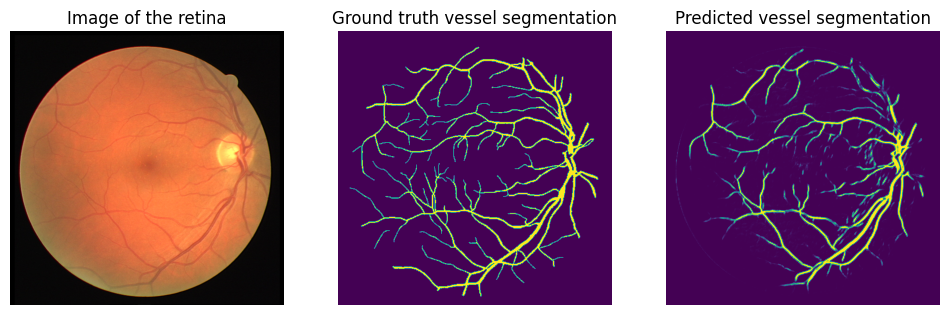

In [11]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations,
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

# Exercises



## Number of parameters

The first convolutional layer in the MNIST example has 320 parameters. The first fully connected layer has 1179,776 parameters. What do these parameters correspond to?

<font color='#770a0a'>What is the general expression for the number of parameters of 1) a convolutional layer and 2) a fully-connected layer?</font>

a: The number of parameters in a convolutional layer corresponds to:
    
$(The height of the filter * The width of the filter + 1 bias weight) * The number of filters = (3*3+1)*32=320$

b: The number of parameters in a fully-connected layer corresponds to:
    
$(The size of the input + 1 bias weight) * the amount of nodes/neurons in the layer = (9216+1)*128=1179776$

## Fully-convolutional MNIST model

Modify the model in the MNIST example in such a way that it only contains convolutional layers while keeping the same number of parameters. If you do the modification correctly, the two models will have the same behaviour (i.e. they will represent the same model, only with different implementation). Show this experimentally.

In [12]:
# load the MNIST the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale the image intensities to the 0-1 range
x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)

# convert the data to channel-last
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# convert the labels to one-hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8431 - loss: 0.4938 - val_accuracy: 0.9822 - val_loss: 0.0552
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9729 - loss: 0.0903 - val_accuracy: 0.9859 - val_loss: 0.0418
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9796 - loss: 0.0682 - val_accuracy: 0.9895 - val_loss: 0.0329
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9847 - loss: 0.0509 - val_accuracy: 0.9892 - val_loss: 0.0321
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9878 - loss: 0.0414 - val_accuracy: 0.9905 - val_loss: 0.0308
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9873 - loss: 0.0388 - val_accuracy: 0.9894 - val_loss: 0.0349
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9898 - loss: 0.0325 - val_accuracy: 0.9905 - val_loss: 0.0294
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9909 - loss: 0.0293 - val_accuracy: 

## U-Net architecture

<font color='#770a0a'> What is the role of the skip connections in the U-Net neural network architecture? Will it be possible to train the exact same architecture with the skip connections omitted? If yes, what would be the expected result? If no, what would be the cause of the error?</font>

It would be possible to train a neural network based on the U-Net architecture. However, since the convolutional blocks in the expansive path do not take reference from the contracting path, the original image with the segmentations is reconstructed from only the feature maps. Therefore, the image is not reconstructed well and the positions of the segmentations are not precise.

## Data augmentation

<font color='#770a0a'>Why does data augmentation result in less overfitting? Can data augmentation be applied to the test samples? If yes, towards what goal? If no, what is preventing that?</font>

Data augmentation results in less overfitting, because it creates more data for the model to learn from. This makes that the model is able to generalize better to unseen data.
This should not be applied to test samples however. You obviously cannot use these augmented test samples in training, as you then train the model on information it should only be tested on. Additionally, using these augmented test samples in testing is also wrong, as you then test the model on facribated/fake samples.

Implement random brightness augmentation of the image data by adding a random offset to the image intensity before passing them trough the network at training time. Train a model with random brightness augmentation and compare it to the baseline above.

(20, 584, 565, 3)


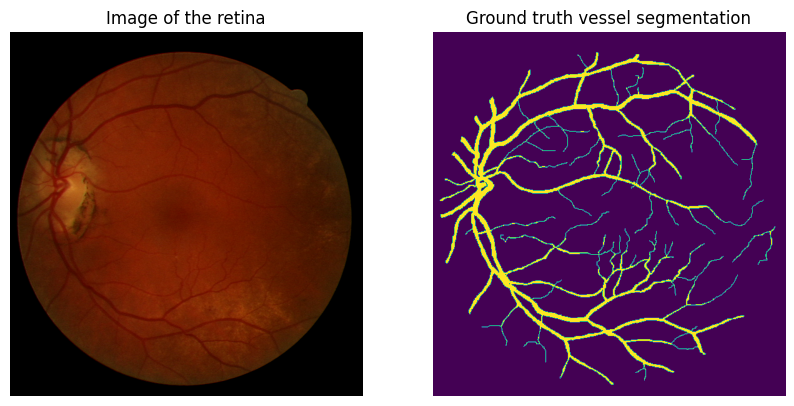

(16, 584, 565, 3)
(16, 584, 565, 1)
(16, 584, 565, 1)
(4, 584, 565, 3)
(4, 584, 565, 1)
(4, 584, 565, 1)


In [15]:
import random

# location of the DRIVE dataset
train_paths = glob(data_folder + 'training/images/*.tif')
images, masks, segmentations = load_data(train_paths)

def adjust_brightness(images, factor):
    return np.clip(images + factor, 0.0, 1.0)

images_bright = np.zeros_like(images)

for i in range(images.shape[0]):  # Iterate over each image by index
    random_brightness = round(random.uniform(-0.3, 0.3), 2)  # Random brightness factor between -0.5 and 0.5
    image_bright = adjust_brightness(images[i], random_brightness)  # Adjust brightness
    images_bright[i] = image_bright  # Store the adjusted image in the corresponding index of the array


# print the shape of image dataset
print(images_bright.shape)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(images_bright[0])

plt.subplot(1, 2, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(segmentations[0][:, :, 0])

plt.show()

# divide in training and validation
train_images, val_images, train_masks, val_masks, train_segmentations, val_segmentations = train_test_split(
    images_bright, masks, segmentations, test_size=0.2, random_state=7)

# print the shape of the training and valudation datasets
print(train_images.shape)
print(train_masks.shape)
print(train_segmentations.shape)
print(val_images.shape)
print(val_masks.shape)
print(val_segmentations.shape)

(16, 32, 32, 3)


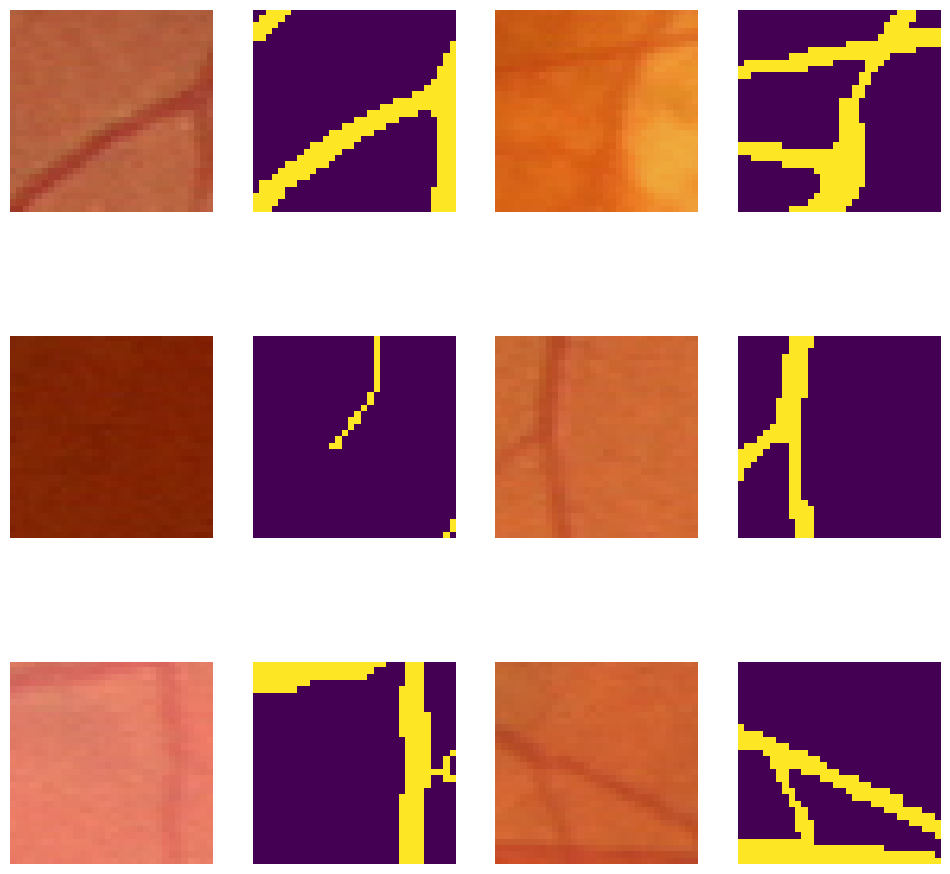

In [16]:
from unet_utils import extract_patches, preprocessing

# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# visualize a couple of patches as a visual check
patches, patches_segmentations = extract_patches(train_images, train_segmentations, patch_size, patches_per_im=1, seed=7)

print(patches.shape)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

for i in range(0, 3):
    axes[i, 0].axis('off')
    axes[i, 0].imshow(patches[i])
    axes[i, 1].axis('off')
    axes[i, 1].imshow(patches_segmentations[i][:, :, 0])
    axes[i, 2].axis('off')
    axes[i, 2].imshow(patches[i+5])
    axes[i, 3].axis('off')
    axes[i, 3].imshow(patches_segmentations[i+5][:, :, 0])

plt.show()

In [17]:
# pad the validation data to fit the U-Net model
# images of shape (584, 565) shape result in concatenation error due to the odd number of columns

print("Old shape:", val_images.shape)

val_images, val_masks, val_segmentations = preprocessing(
    val_images,
    val_masks,
    val_segmentations,
    desired_shape=(584, 584))

print("New shape:", val_images.shape)

Old shape: (4, 584, 565, 3)
New shape: (4, 584, 584, 3)


In [18]:
import os
from unet_model import unet
from unet_utils import datagenerator
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history = model.fit(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

(1, 584, 565, 3)
(1, 584, 565, 1)
Epoch 1/250
50/50 - 29s - 581ms/step - accuracy: 0.8489 - loss: 0.4661 - val_accuracy: 0.9107 - val_loss: 0.3761
Epoch 2/250
50/50 - 1s - 23ms/step - accuracy: 0.9524 - loss: 0.2677 - val_accuracy: 0.9107 - val_loss: 0.3020
Epoch 3/250
50/50 - 1s - 23ms/step - accuracy: 0.9556 - loss: 0.2091 - val_accuracy: 0.9107 - val_loss: 0.2990
Epoch 4/250
50/50 - 1s - 22ms/step - accuracy: 0.9563 - loss: 0.1769 - val_accuracy: 0.9107 - val_loss: 0.3031
Epoch 5/250
50/50 - 1s - 22ms/step - accuracy: 0.9611 - loss: 0.1417 - val_accuracy: 0.9107 - val_loss: 0.3347
Epoch 6/250
50/50 - 1s - 22ms/step - accuracy: 0.9604 - loss: 0.1293 - val_accuracy: 0.9108 - val_loss: 0.3874
Epoch 7/250
50/50 - 1s - 23ms/step - accuracy: 0.9593 - loss: 0.1293 - val_accuracy: 0.9111 - val_loss: 0.4063
Epoch 8/250
50/50 - 1s - 22ms/step - accuracy: 0.9638 - loss: 0.1113 - val_accuracy: 0.9115 - val_loss: 0.4084
Epoch 9/250
50/50 - 1s - 23ms/step - accuracy: 0.9633 - loss: 0.1051 - val_a

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


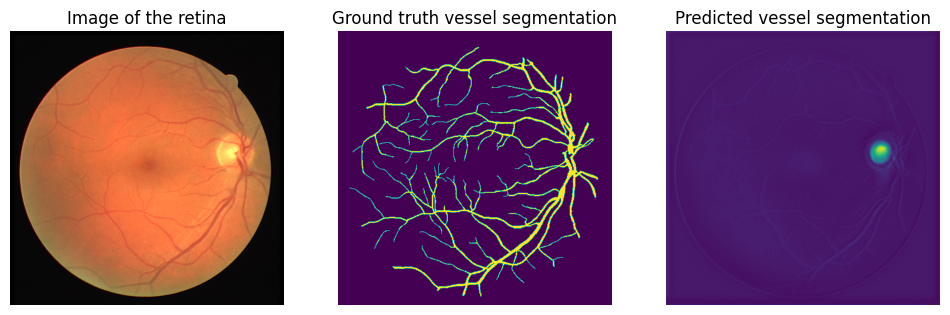

In [19]:
# run the model on one test image and show the results
from unet_utils import preprocessing


# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations,
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)


# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

Implement data augmentation procedure that in addition to brightness augmentation also performs b-spline geometric augmentation using the [`gryds`](https://github.com/tueimage/gryds) package (you can look at the documentation of the package for an example on how to do that). Compare the new model with the baseline and the model that only performs brightness augmentation.

In [1]:
from gryds import BSplineTransformation, Interpolator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from glob import glob

def augment_image(image, segmentation):
    random_grid = np.random.rand(2, 3, 3)
    random_grid -= 0.5
    random_grid /= 5

    bspline_transformation = BSplineTransformation(random_grid)

    transformed_image = np.zeros_like(image)
    transformed_segmentation = np.zeros_like(segmentation)

    # Apply the same transformation to each channel of the image
    for c in range(image.shape[2]):
        interpolator = Interpolator(image[..., c], order=1)
        transformed_image[..., c] = interpolator.transform(bspline_transformation)

    # Apply the same transformation to each channel of the segmentation
    for c in range(segmentation.shape[2]):
        interpolator = Interpolator(segmentation[..., c], order=1)
        transformed_segmentation[..., c] = interpolator.transform(bspline_transformation)

    return transformed_image, transformed_segmentation

transformed_images = np.zeros_like(images)
transformed_segmentations = np.zeros_like(segmentations)

# Apply transformation to each image and its corresponding segmentation
for i in range(images.shape[0]):
    image_trans, segmentation_trans = augment_image(images[i], segmentations[i])
    transformed_images[i] = image_trans
    transformed_segmentations[i] = segmentation_trans

# Print the shape of the transformed image dataset
print(transformed_images.shape)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(transformed_images[0])

plt.subplot(1, 2, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(transformed_segmentations[0][:, :, 0])

plt.show()

# Divide into training and validation sets
train_images, val_images, train_masks, val_masks, train_segmentations, val_segmentations = train_test_split(
    transformed_images, masks, transformed_segmentations, test_size=0.2, random_state=7)

# Print the shape of the training and validation datasets
print(train_images.shape)
print(train_masks.shape)
print(train_segmentations.shape)
print(val_images.shape)
print(val_masks.shape)
print(val_segmentations.shape)

ModuleNotFoundError: No module named 'gryds'

(16, 32, 32, 3)


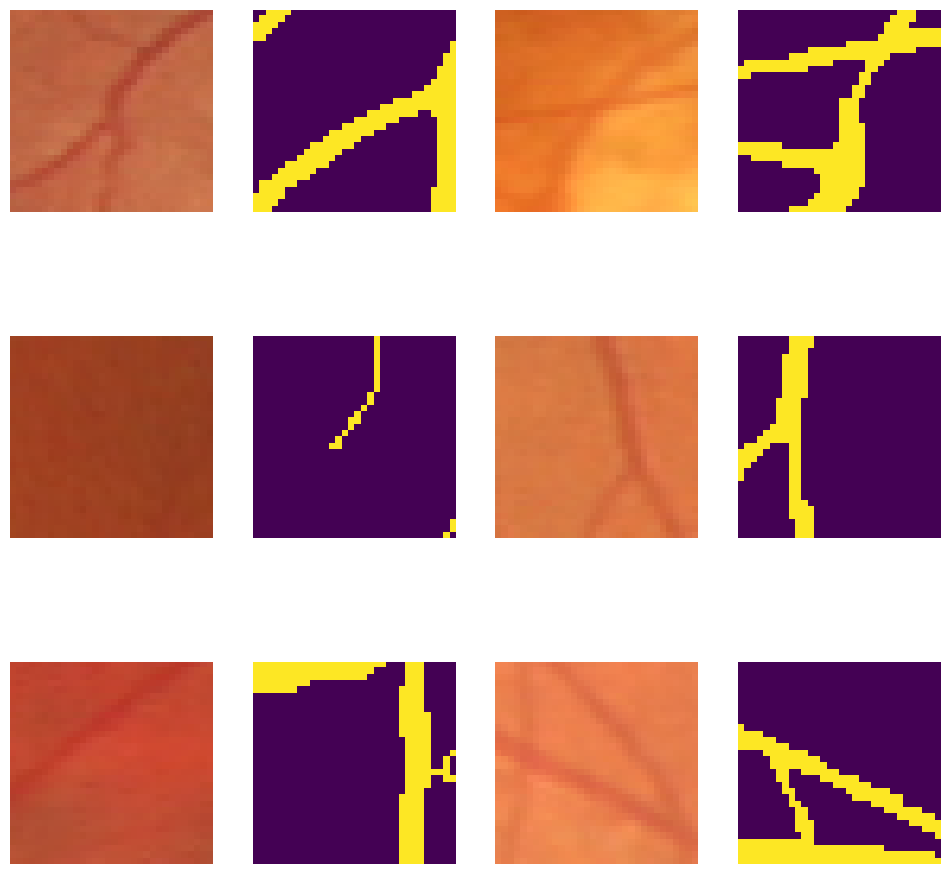

In [21]:
from unet_utils import extract_patches, preprocessing

# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# visualize a couple of patches as a visual check
patches, patches_segmentations = extract_patches(train_images, train_segmentations, patch_size, patches_per_im=1, seed=7)

print(patches.shape)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

for i in range(0, 3):
    axes[i, 0].axis('off')
    axes[i, 0].imshow(patches[i])
    axes[i, 1].axis('off')
    axes[i, 1].imshow(patches_segmentations[i][:, :, 0])
    axes[i, 2].axis('off')
    axes[i, 2].imshow(patches[i+5])
    axes[i, 3].axis('off')
    axes[i, 3].imshow(patches_segmentations[i+5][:, :, 0])

plt.show()

In [22]:
# pad the validation data to fit the U-Net model
# images of shape (584, 565) shape result in concatenation error due to the odd number of columns

print("Old shape:", val_images.shape)

val_images, val_masks, val_segmentations = preprocessing(
    val_images,
    val_masks,
    val_segmentations,
    desired_shape=(584, 584))

print("New shape:", val_images.shape)

Old shape: (4, 584, 565, 3)
New shape: (4, 584, 584, 3)


In [23]:
import os
from unet_model import unet
from unet_utils import datagenerator
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history = model.fit(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

(1, 584, 565, 3)
(1, 584, 565, 1)
Epoch 1/250
50/50 - 26s - 526ms/step - accuracy: 0.7167 - loss: 0.6359 - val_accuracy: 0.9107 - val_loss: 0.5054
Epoch 2/250
50/50 - 1s - 23ms/step - accuracy: 0.8788 - loss: 0.4857 - val_accuracy: 0.9049 - val_loss: 0.5527
Epoch 3/250
50/50 - 1s - 23ms/step - accuracy: 0.8958 - loss: 0.3836 - val_accuracy: 0.9107 - val_loss: 0.4753
Epoch 4/250
50/50 - 1s - 23ms/step - accuracy: 0.9001 - loss: 0.3289 - val_accuracy: 0.9107 - val_loss: 0.4489
Epoch 5/250
50/50 - 1s - 25ms/step - accuracy: 0.9016 - loss: 0.3028 - val_accuracy: 0.9107 - val_loss: 0.2959
Epoch 6/250
50/50 - 1s - 24ms/step - accuracy: 0.9034 - loss: 0.2880 - val_accuracy: 0.9107 - val_loss: 0.3353
Epoch 7/250
50/50 - 1s - 24ms/step - accuracy: 0.9014 - loss: 0.2882 - val_accuracy: 0.9093 - val_loss: 0.2973
Epoch 8/250
50/50 - 1s - 23ms/step - accuracy: 0.9040 - loss: 0.2831 - val_accuracy: 0.9107 - val_loss: 0.2934
Epoch 9/250
50/50 - 1s - 23ms/step - accuracy: 0.9013 - loss: 0.2872 - val_a

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


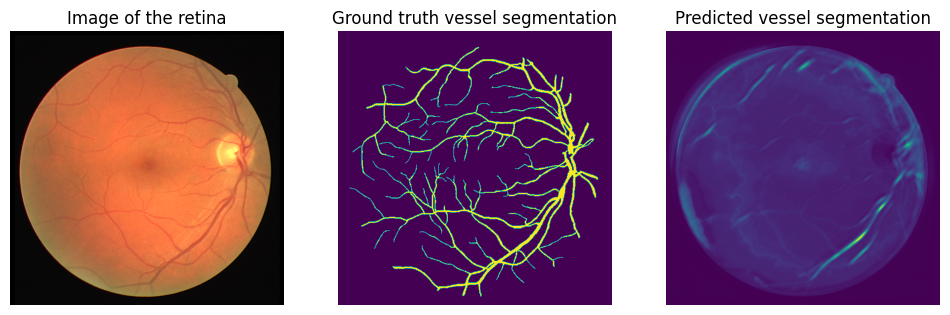

In [24]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations,
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

Among the three models evaluated, the baseline model demonstrates the best performance, achieving a validation accuracy of 94%. The model employing geometric augmentation follows with a validation accuracy of 92%, while the model using brightness augmentation has the lowest validation accuracy at 91%.

Examining the predicted vessel segmentations from these models reinforces these findings. The baseline model's predicted segmentation closely matches the ground truth, displaying clear lines that accurately represent the retinal vessels. In contrast, the geometric augmentation model's predicted segmentation exhibits significantly less clarity; the vessels are much less distinct, and the image predominantly shows a blue region representing the retina with fewer visible vessels than expected. This observation confirms the inferior performance of the geometric augmentation model compared to the baseline.

Moreover, the brightness augmentation model's predicted segmentation displays the vessels even less clearly than the geometric augmentation model. The image shows only a small light circle representing the optic nerve, while the vessels are extremely faint. This suggests that, despite similar validation accuracies, the brightness augmentation model's ability to accurately segment vessels is the poorest among the three.